# Challenge: Backtest on Other Datasets

## Download data from `yfinance`

In [ ]:
import yfinance as yf

ticker = 'NFLX'
df = yf.download(ticker)
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200
...,...,...,...,...,...,...
2023-11-20,465.399994,476.760010,465.399994,474.470001,474.470001,3617600
2023-11-21,472.630005,477.019989,471.209991,474.950012,474.950012,2997700
2023-11-22,476.799988,482.700012,476.559998,478.000000,478.000000,2841600


## Preprocess the data

### Filter the date range

- Since 1 year ago at least

In [ ]:
df = df.loc['2020-01-01':].copy()
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,326.100006,329.980011,324.779999,329.809998,329.809998,4485800
2020-01-03,326.779999,329.859985,325.529999,325.899994,325.899994,3806900
2020-01-06,323.119995,336.359985,321.200012,335.829987,335.829987,5663100
2020-01-07,336.470001,336.700012,330.299988,330.750000,330.750000,4703200
2020-01-08,331.489990,342.700012,331.049988,339.260010,339.260010,7104500
...,...,...,...,...,...,...
2023-11-20,465.399994,476.760010,465.399994,474.470001,474.470001,3617600
2023-11-21,472.630005,477.019989,471.209991,474.950012,474.950012,2997700
2023-11-22,476.799988,482.700012,476.559998,478.000000,478.000000,2841600


### Create the target variable

#### Percentage change

- Percentage change on `Adj Close` for tomorrow

In [ ]:
df['change_tomorrow'] = df['Adj Close'].pct_change(-1)
df.change_tomorrow

Date
2020-01-02    0.011998
2020-01-03   -0.029569
2020-01-06    0.015359
2020-01-07   -0.025084
2020-01-08    0.010725
                ...   
2023-11-20   -0.001011
2023-11-21   -0.006381
2023-11-22   -0.003253
2023-11-24    0.000814
2023-11-27         NaN
Name: change_tomorrow, Length: 983, dtype: float64

If you look at the change from the first day to the next one, the price decreases. Therefore, the first value of the previous output should be negative.

In [ ]:
df['Adj Close']

Date
2020-01-02    329.809998
2020-01-03    325.899994
2020-01-06    335.829987
2020-01-07    330.750000
2020-01-08    339.260010
                 ...    
2023-11-20    474.470001
2023-11-21    474.950012
2023-11-22    478.000000
2023-11-24    479.559998
2023-11-27    479.170013
Name: Adj Close, Length: 983, dtype: float64

We shall multiply by -1:

In [ ]:
df.change_tomorrow = df.change_tomorrow * -1
df

,Open,High,Low,Close,Adj Close,Volume,change_tomorrow
Date,,,,,,,
2020-01-02,326.100006,329.980011,324.779999,329.809998,329.809998,4485800,-0.011998
2020-01-03,326.779999,329.859985,325.529999,325.899994,325.899994,3806900,0.029569
2020-01-06,323.119995,336.359985,321.200012,335.829987,335.829987,5663100,-0.015359
2020-01-07,336.470001,336.700012,330.299988,330.750000,330.750000,4703200,0.025084
2020-01-08,331.489990,342.700012,331.049988,339.260010,339.260010,7104500,-0.010725
...,...,...,...,...,...,...,...
2023-11-20,465.399994,476.760010,465.399994,474.470001,474.470001,3617600,0.001011
2023-11-21,472.630005,477.019989,471.209991,474.950012,474.950012,2997700,0.006381
2023-11-22,476.799988,482.700012,476.559998,478.000000,478.000000,2841600,0.003253


To better read the data, we shall multiply by 100 to have percentage values:

In [ ]:
df.change_tomorrow = df.change_tomorrow * 100
df

,Open,High,Low,Close,Adj Close,Volume,change_tomorrow
Date,,,,,,,
2020-01-02,326.100006,329.980011,324.779999,329.809998,329.809998,4485800,-1.199756
2020-01-03,326.779999,329.859985,325.529999,325.899994,325.899994,3806900,2.956851
2020-01-06,323.119995,336.359985,321.200012,335.829987,335.829987,5663100,-1.535899
2020-01-07,336.470001,336.700012,330.299988,330.750000,330.750000,4703200,2.508403
2020-01-08,331.489990,342.700012,331.049988,339.260010,339.260010,7104500,-1.072516
...,...,...,...,...,...,...,...
2023-11-20,465.399994,476.760010,465.399994,474.470001,474.470001,3617600,0.101066
2023-11-21,472.630005,477.019989,471.209991,474.950012,474.950012,2997700,0.638073
2023-11-22,476.799988,482.700012,476.559998,478.000000,478.000000,2841600,0.325298


#### Drop rows with any missing data

In [ ]:
df = df.dropna().copy()
df

,Open,High,Low,Close,Adj Close,Volume,change_tomorrow
Date,,,,,,,
2020-01-02,326.100006,329.980011,324.779999,329.809998,329.809998,4485800,-1.199756
2020-01-03,326.779999,329.859985,325.529999,325.899994,325.899994,3806900,2.956851
2020-01-06,323.119995,336.359985,321.200012,335.829987,335.829987,5663100,-1.535899
2020-01-07,336.470001,336.700012,330.299988,330.750000,330.750000,4703200,2.508403
2020-01-08,331.489990,342.700012,331.049988,339.260010,339.260010,7104500,-1.072516
...,...,...,...,...,...,...,...
2023-11-17,466.950012,467.649994,462.760010,465.910004,465.910004,2798500,1.804118
2023-11-20,465.399994,476.760010,465.399994,474.470001,474.470001,3617600,0.101066
2023-11-21,472.630005,477.019989,471.209991,474.950012,474.950012,2997700,0.638073


#### BONUS: how to interpret the distribution of a continuous variable

Based on the following normal distribution:

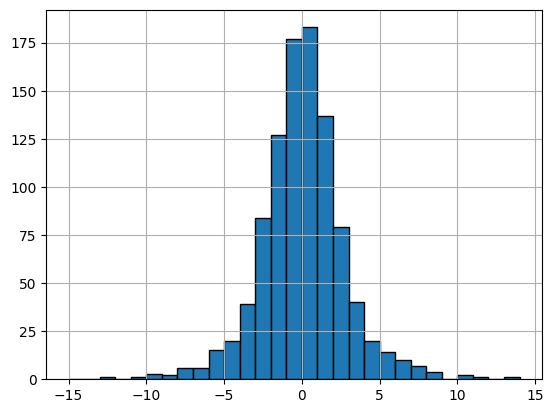

In [ ]:
df.change_tomorrow.hist(bins=range(-15,15), edgecolor='black');

And the standard deviation:

In [ ]:
df.change_tomorrow.std()

3.3730328702645456

We can say that 68% of the changes are between -3.5 and 3.5, approximately.

#### Change sign

Did the stock go up or down?

In [ ]:
import numpy as np

In [ ]:
df.change_tomorrow = np.where(df.change_tomorrow > 0, 1, -1)
df

,Open,High,Low,Close,Adj Close,Volume,change_tomorrow
Date,,,,,,,
2020-01-02,326.100006,329.980011,324.779999,329.809998,329.809998,4485800,-1
2020-01-03,326.779999,329.859985,325.529999,325.899994,325.899994,3806900,1
2020-01-06,323.119995,336.359985,321.200012,335.829987,335.829987,5663100,-1
2020-01-07,336.470001,336.700012,330.299988,330.750000,330.750000,4703200,1
2020-01-08,331.489990,342.700012,331.049988,339.260010,339.260010,7104500,-1
...,...,...,...,...,...,...,...
2023-11-17,466.950012,467.649994,462.760010,465.910004,465.910004,2798500,1
2023-11-20,465.399994,476.760010,465.399994,474.470001,474.470001,3617600,1
2023-11-21,472.630005,477.019989,471.209991,474.950012,474.950012,2997700,1


## Compute Machine Learning model

Proposal: Random Forest within `ensemble` module of `sklearn` library

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(max_depth=7, random_state=42)

In [ ]:
y = df.change_tomorrow
X = df.drop(columns='change_tomorrow')

In [15]:
model.fit(X, y)

RandomForestClassifier(max_depth=7, random_state=42)

In [16]:
model.score(X, y)

0.8044806517311609

## Backtesting

### Create the strategy

In [17]:
from backtesting import Strategy

In [18]:
class SimpleClassificationUD(Strategy):
    def init(self):
        self.model = model
        self.already_bought = False

    def next(self):
        explanatory_today = self.data.df.iloc[-1:, :]
        forecast_tomorrow = self.model.predict(explanatory_today)[0]
        
        # conditions to sell or buy
        if forecast_tomorrow == 1 and self.already_bought == False:
            self.buy()
            self.already_bought = True
        elif forecast_tomorrow == -1 and self.already_bought == True:
            self.sell()
            self.already_bought = False
        else:
            pass

### Run the Backtest

In [19]:
from backtesting import Backtest

In [20]:
bt = Backtest(
    X, SimpleClassificationUD, cash=10000,
    commission=.002, exclusive_orders=True
)

In [21]:
results = bt.run()

### Show the report in a DataFrame

In [ ]:
results.to_frame('Value').loc[:'Return [%]']

,Value
Start,2020-01-02 00:00:00
End,2023-05-15 00:00:00
Duration,1229 days 00:00:00
Exposure Time [%],99.764151
Equity Final [$],28916881.488771
Equity Peak [$],28977622.433596
Return [%],289068.814888


## Plot the backtest report

> Don't worry about this new tool just yet, we will explain in a future chapter how to interpret the following chart.

In [ ]:
bt.plot(filename='backtest_report.html')

Row(id='1407', ...)

## How to invest based on the numerical increase?

> Instead of the direction (UP or DOWN)

Next chapter → [Backtesting with Regression Models]()

Classification Model | Regression Model
-|-
![](src/pred_classification.png) | ![](src/pred_regression.png)

Classification Strategy | Regression Strategy
-|-
![](src/res_classification.png) | ![](src/res_regression.png)